In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data_train = pd.read_csv('train.csv')
Data_test= pd.read_csv('test.csv')

In [3]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analyze by visualizing data
### Correlating
#### To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

##### Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived . We decide to include this feature in our model.
##### Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% .
###### SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

In [5]:
Data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


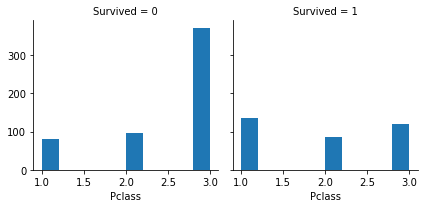

In [6]:
K= sns.FacetGrid(Data_train, col='Survived')
K.map(plt.hist, 'Pclass')

In [7]:
Data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


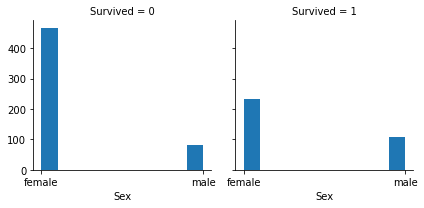

In [8]:
L= sns.FacetGrid(Data_train, col='Survived')
L.map(plt.hist, 'Sex')

In [9]:
Data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


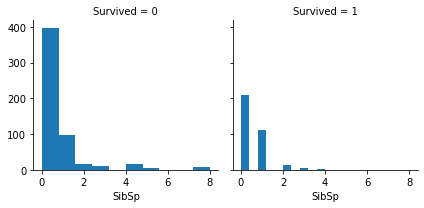

In [10]:
N= sns.FacetGrid(Data_train, col='Survived')
N.map(plt.hist, 'SibSp')

In [11]:
Data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


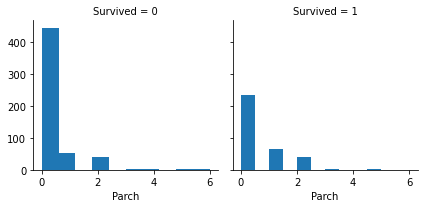

In [12]:
F= sns.FacetGrid(Data_train, col='Survived')
F.map(plt.hist, 'Parch')

## Correlating numerical features
### Age

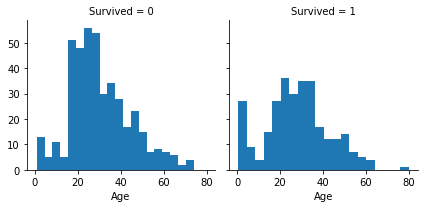

In [13]:
g = sns.FacetGrid(Data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Correlating numerical and ordinal features
### Age , pclass

E:\Python_Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


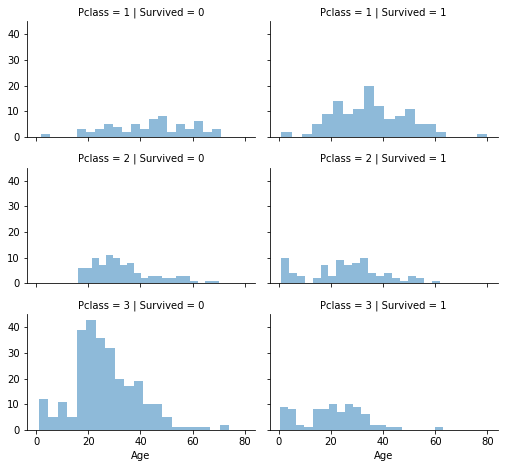

In [14]:
grid = sns.FacetGrid(Data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Correlating categorical and numerical features
### We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric)

E:\Python_Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\Python_Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


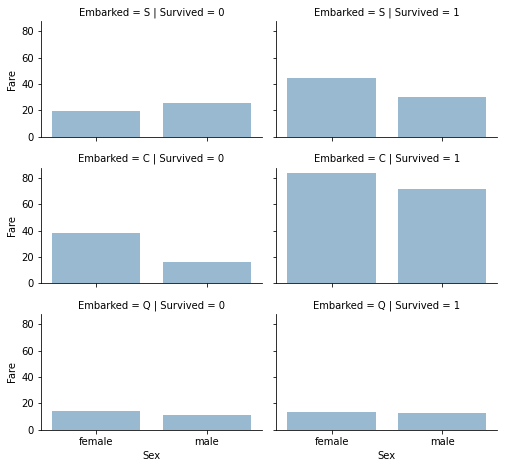

In [15]:
grid = sns.FacetGrid(Data_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Correlating categorical and numerical features
##### correlating among (pclass),(Sex),(Age)

E:\Python_Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


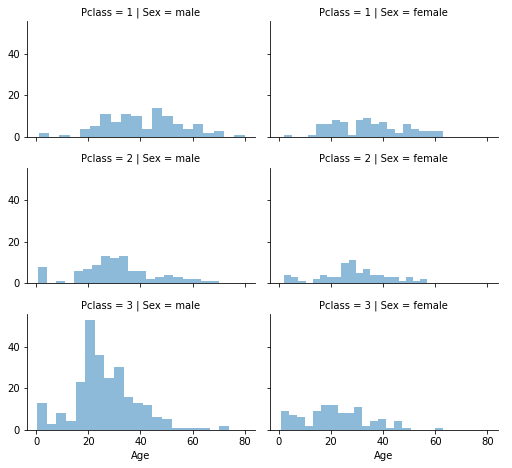

In [16]:
grid = sns.FacetGrid(Data_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Wrangle data

In [17]:
Data_train_copy=Data_train.copy()
Data_test_copy=Data_test.copy()
combine= [Data_train_copy,Data_test_copy]

## Correcting by dropping features
### This is a good starting goal to execute.
#### By dropping features we are dealing with fewer data points
##### Based on our assumptions and decisions we want to drop the Cabin  and Ticket  features

In [18]:
Data_train_copy= Data_train_copy.drop(['Ticket', 'Cabin'], axis=1)
Data_test_copy = Data_test_copy.drop(['Ticket', 'Cabin'], axis=1)
combine= [Data_train_copy,Data_test_copy]

### We want to extract ( Title ) from column (name) and drop this column

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(Data_train_copy['Title'],Data_train_copy['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### We can replace many titles with a more common name or classify them as Rare

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
Data_train_copy[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### We can convert the categorical titles to ordinal

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training  and testing dataset.

In [22]:
Data_train_copy = Data_train_copy.drop(['Name', 'PassengerId'], axis=1)
Data_test_copy= Data_test_copy.drop(['Name', 'PassengerId'], axis=1)
combine= [Data_train_copy,Data_test_copy]

## Converting a categorical feature
### Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [24]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)


### Let us create Age bands and determine correlations with Survived

In [25]:
Data_train_copy['AgeBand'] = pd.cut(Data_train_copy['Age'], 5)
Data_train_copy[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### Let us replace Age with ordinals based on these bands

In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4

### Remove the AgeBand feature.

In [27]:
Data_train_copy =Data_train_copy.drop(['AgeBand'], axis=1)
combine = [Data_train_copy,Data_test_copy]

### We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

Data_train_copy[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Let us drop Parch and SibSpfeatures in favor of FamilySize

In [29]:
Data_train_copy = Data_train_copy.drop(['Parch', 'SibSp'], axis=1)
Data_test_copy = Data_test_copy.drop(['Parch', 'SibSp'], axis=1)
combine = [Data_train_copy ,Data_test_copy]

### Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance

In [30]:
freq_port = Data_train_copy.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
Data_train_copy[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### We can now convert the Embarked feature to numeric.

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### We can now complete the missing value of the  Fare feature 

In [32]:
Data_test_copy['Fare'].fillna(Data_test_copy['Fare'].dropna().median(), inplace=True)
Data_train_copy['FareBand'] = pd.qcut(Data_train_copy['Fare'], 4)
Data_train_copy[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### Convert the Fare feature to ordinal values based on the FareBand

In [33]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
Data_train_copy = Data_train_copy.drop(['FareBand'], axis=1)
combine = [Data_train_copy,Data_test_copy]

## The End of  Wrangle data

In [34]:
Data_train_copy.head(10)
#Data_train_copy.to_csv(r'C:\Users\Khalifa\Desktop\DataScience\train_set.csv', index=False)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0,0,1,2
1,1,1,1,2,3,1,3,2
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,2
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,5
8,1,3,1,1,1,0,3,3
9,1,2,1,0,2,1,3,2


In [35]:
Data_test_copy.head(10)
#Data_test_copy.to_csv(r'C:\Users\Khalifa\Desktop\DataScience\test_set.csv', index=False)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,2,0,2,1,1
1,3,1,2,0,0,3,2
2,2,0,3,1,2,1,1
3,3,0,1,1,0,1,1
4,3,1,1,1,0,3,3
5,3,0,0,1,0,1,1
6,3,1,1,0,2,2,1
7,2,0,1,2,0,1,3
8,3,1,1,0,1,3,1
9,3,0,1,2,0,1,3


## Model, predict and solve.
### Now we are ready to train a model and predict the required solution.
### we can  choice from this  models :

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree
- Random Forrest


In [36]:
X_train = Data_train_copy.drop("Survived", axis=1)
Y_train = Data_train_copy["Survived"]
X_test  = Data_test_copy
y_test=pd.read_csv('gender_submission.csv')
Y_test=y_test["Survived"]
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((891, 7), (891,), (418, 7), (418,))

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = accuracy_score(Y_test,Y_pred)*100
print("Accuracy for test data:",acc_log)

Accuracy for test data: 92.58373205741627


## Support Vector Machines

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = accuracy_score(Y_test,Y_pred)*100
print("Accuracy for test data:",acc_svc)

Accuracy for test data: 93.77990430622009


## KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = accuracy_score(Y_test,Y_pred)*100
print("Accuracy for test data:",acc_knn)

Accuracy for test data: 84.21052631578947


## DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(Y_test,Y_pred)*100
print("Accuracy for test data:",acc_decision_tree)

Accuracy for test data: 84.44976076555024


##  RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = accuracy_score(Y_test,Y_pred)*100
print("Accuracy for test data:",acc_random_forest)

Accuracy for test data: 84.688995215311


## Model evaluation

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest','Decision Tree'],
    'Score': [acc_svc, acc_knn,acc_log,acc_random_forest,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,93.779904
2,Logistic Regression,92.583732
3,Random Forest,84.688995
4,Decision Tree,84.449761
1,KNN,84.210526


## The End . 